In [37]:
import math
import random
import numpy as np
import matplotlib.pyplot as plot

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

## Prepare Randamized Data Points

In [240]:
X = [ x for x in np.arange(0.5, 1.5, 0.02)]
y = [ 0.8 + math.log(x) + random.uniform(-0.05, 0.05) for x in X]

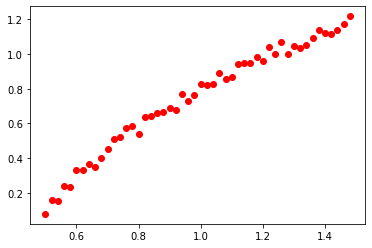

In [241]:
plot.plot(X, y, 'ro')
plot.show()

## Build model: One Input, One Neuron

In [242]:
model_1 = Sequential([
    Dense(1),
])
model_1(tf.ones((1, 1)))
model_1.compile('SGD', 'mse')
model_1.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (1, 1)                    2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [245]:
model_1.fit(X, y, epochs=10, batch_size=16)

Epoch 1/10
4/4 [==============================] - 0s 665us/step - loss: 0.0085
Epoch 2/10
4/4 [==============================] - 0s 998us/step - loss: 0.0073
Epoch 3/10
4/4 [==============================] - 0s 997us/step - loss: 0.0064
Epoch 4/10
4/4 [==============================] - 0s 990us/step - loss: 0.0058
Epoch 5/10
4/4 [==============================] - 0s 998us/step - loss: 0.0052
Epoch 6/10
4/4 [==============================] - 0s 997us/step - loss: 0.0050
Epoch 7/10
4/4 [==============================] - 0s 998us/step - loss: 0.0048
Epoch 8/10
4/4 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 9/10
4/4 [==============================] - 0s 997us/step - loss: 0.0045
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.0044


[<tf.Variable 'dense_98/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9404945]], dtype=float32)>, <tf.Variable 'dense_98/bias:0' shape=(1,) dtype=float32, numpy=array([-0.16716804], dtype=float32)>]


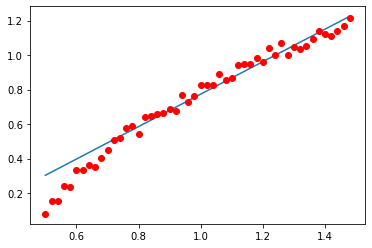

In [246]:
print(model_1.weights)
plot.plot(X, model_1.predict(X))
plot.plot(X, y, 'ro')
plot.show()

## Build model: Three Input, One Neuron

In [247]:
X_2 = [[X[i-2], X[i-1], X[i]] for i in range(2, len(X))]
y_2 = y[2:]

In [251]:
model_2 = Sequential([
    Dense(1),
])
model_2(tf.ones((1, 3)))

model_2.compile('SGD', 'mse')
model_2.summary()

model_2.fit(X_2, y_2, epochs=10, batch_size=16)

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (1, 1)                    4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 998us/step - loss: 0.0367
Epoch 2/10
3/3 [==============================] - 0s 499us/step - loss: 0.0237
Epoch 3/10
3/3 [==============================] - 0s 997us/step - loss: 0.0193
Epoch 4/10
3/3 [==============================] - 0s 997us/step - loss: 0.0142
Epoch 5/10
3/3 [==============================] - 0s 793us/step - loss: 0.0133
Epoch 6/10
3/3 [==============================] - 0s 997us/step - loss: 0.0107
Epoch 7/10
3/3 [==============================] - 0s 997us/step - loss: 0.0100
Epoch 8/10
3/3 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 9/10
3/3 [=======

In [249]:
print(model_2.weights)

[<tf.Variable 'dense_99/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5937246 ],
       [ 0.03190725],
       [ 1.2371689 ]], dtype=float32)>, <tf.Variable 'dense_99/bias:0' shape=(1,) dtype=float32, numpy=array([0.05911745], dtype=float32)>]


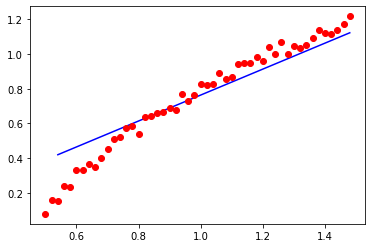

In [252]:
plot.plot(X[2:], model_2.predict(X_2), 'b')
plot.plot(X, y, 'ro')
plot.show()

## Build Model: Three Inputs, 

In [269]:
model_3 = Sequential([
    Dense(3),
    Activation('tanh'),
    Dense(1)
])
model_3(tf.ones((1, 3)))

model_3.compile('Adam', 'mse')
model_3.summary()

model_3.fit(X_2, y_2, epochs=50, batch_size=16, verbose=1)

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (1, 3)                    12        
_________________________________________________________________
activation_51 (Activation)   (1, 3)                    0         
_________________________________________________________________
dense_128 (Dense)            (1, 1)                    4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 0s 998us/step - loss: 0.0917
Epoch 2/50
3/3 [==============================] - 0s 996us/step - loss: 0.0704
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0794
Epoch 4/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0734
Epoch 5/50
3/3 [==============================] - 0s 499us/step - loss: 0.0

In [210]:
print(model_3.weights)

[<tf.Variable 'dense_84/kernel:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.3442121 , -0.7705488 ,  0.8973453 ],
       [ 0.79291093,  0.02951691, -0.86825895],
       [ 0.20359662,  0.5609369 , -0.95754623]], dtype=float32)>, <tf.Variable 'dense_84/bias:0' shape=(3,) dtype=float32, numpy=array([0.07868221, 0.06852245, 0.        ], dtype=float32)>, <tf.Variable 'dense_85/kernel:0' shape=(3, 2) dtype=float32, numpy=
array([[ 1.0196195 , -0.92360175],
       [-0.8328447 , -0.56791055],
       [ 1.0298924 , -0.05841398]], dtype=float32)>, <tf.Variable 'dense_85/bias:0' shape=(2,) dtype=float32, numpy=array([0.08169661, 0.        ], dtype=float32)>, <tf.Variable 'dense_86/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.418237 ],
       [0.9536985]], dtype=float32)>, <tf.Variable 'dense_86/bias:0' shape=(1,) dtype=float32, numpy=array([0.34614876], dtype=float32)>]


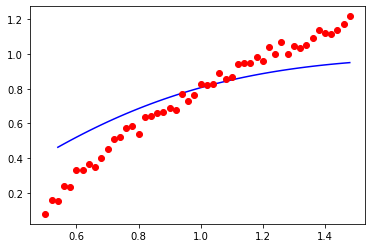

In [270]:
plot.plot(X[2:], model_3.predict(X_2), 'b')
plot.plot(X, y, 'ro')
plot.show()